# Dust Analysis

In [1]:
%%capture
cd ~/Dropbox/Msci-DustyPlasmas/Code

## Import dependencies

In [59]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
matplotlib.style.use('ggplot')
import numpy
import msci.dustyplasma_cpp.dustcpp_wrapper as dcpp
import matplotlib.pyplot as plt
from IPython import get_ipython
import msci.analysis.constants as const
import math

In [60]:
from IPython.display import HTML

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from analysis_dust import BEffectsAnalysis
from utils.utils import generate_particle_equilibrium_positions, prepare_modified_b_field
from plots import dustplots

from IPython import get_ipython

## Run Dust Analysis

In [6]:
beffect1 = BEffectsAnalysis()
beffect1.create_particles(
    numparticles=10,
    initpositions=generate_particle_equilibrium_positions()
)
beffect1.create_pairs()
beffect1.interact_and_iterate(
    iterationsB=500,
    init_iterations=500,
    method='NoGibs',
    modified_b_field=prepare_modified_b_field()
)
beffect1.sort_positions_of_particles()

  0%|          | 0/500 [00:00<?, ?it/s]/Users/yuewang/Dropbox/Msci-DustyPlasmas/Code/particles/dust.py:151: RuntimeWarning: invalid value encountered in true_divide
  connecti = numpy.array([self.pos1[0] - g2.pos1[0], self.pos1[1] - g2.pos1[1], self.pos1[2] - g2.pos1[2]]) / di
100%|██████████| 500/500 [00:01<00:00, 351.88it/s]


In [7]:
%%capture
anim = dustplots.plot(beffect1, False, jn=True)

## Animation

In [8]:
# HTML(anim.to_html5_video())

# Plot magnitude of combined curvature and grad B drifts vs EXB drift without collisional effects to show the regions where either is dominant. No Gibson field used.

In [23]:
%%capture
cd ~/Documents/Repos/dusty-plasmas/msci/analysis

In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
from msci.particles.dust import Dust
from msci.utils.utils import generate_particle_equilibrium_positions, prepare_modified_b_field
from msci.analysis.analysis_dust import BEffectsAnalysis
import msci.analysis.constants as const

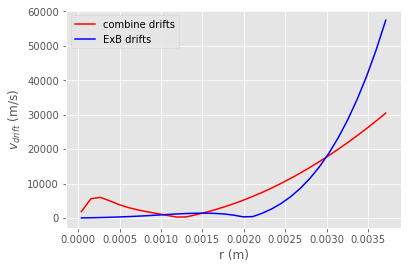

In [26]:
positions = numpy.arange(const.lambdaD, 100*const.lambdaD, 3*const.lambdaD)
magcombinevel = []
magexbvel =[]
def norm(x):
    return numpy.sqrt(x[0]**2+x[1]**2+x[2]**2)

for i in positions:
    g0 = Dust(const.md, const.radd, const.lambdaD, const.phia, const.Zd * const.e, [0, 0, 0], [0, 0, 0],[0, 0, 0])
    g0.Bswitch = True
    g0.pos = [i,0,0.0003825734]
    magcombinevel.append(norm(g0.combinedrift(B=g0.dipoleB(r=const.dipolepos))))
    magexbvel.append(norm(g0.EXBDRIFT(B=g0.dipoleB(r=const.dipolepos))))

plt.plot(positions,magcombinevel,'r-',label='combine drifts')
plt.plot(positions,magexbvel,'b-', label='ExB drifts')
plt.xlabel("r (m)")
plt.ylabel(r'$v_{drift}$ (m/s)')
plt.legend()
plt.show()

# Plotting the magnitude of forces that causes dust particle rotation at a specific distance away. Forces under consideration: EXB Hybrid ion drag, Combined drag forces gradB and curvature drift, vxBforce. No Gibson E field modification.

In [36]:
def norm(x):
    return numpy.sqrt(x[0]**2+x[1]**2+x[2]**2)

beffect1 = BEffectsAnalysis()
beffect1.create_particles(
    numparticles=500,
    initpositions=generate_particle_equilibrium_positions()
)
beffect1.create_pairs()
beffect1.interact_and_iterate(
    iterationsB=2000,
    init_iterations=100,
    method='NoGibs',
    modified_b_field=prepare_modified_b_field()
)
beffect1.sort_positions_of_particles()


  0%|          | 0/100 [00:00<?, ?it/s]/Users/yuewang/Documents/Repos/dusty-plasmas/msci/particles/dust.py:151: RuntimeWarning: invalid value encountered in true_divide
  connecti = numpy.array([self.pos1[0] - g2.pos1[0], self.pos1[1] - g2.pos1[1], self.pos1[2] - g2.pos1[2]]) / di
100%|██████████| 2000/2000 [19:58<00:00,  1.67it/s]


In [47]:
vxbforcelist = []
positions = []
velocities = []
radialfield=[]
crossnosheath = []
crosswithsheath = []
Bfield=[]
driftforcelist = []

for i in beffect1.dustdict:
    positions.append(numpy.sqrt(beffect1.dustdict[i].pos[0]**2+beffect1.dustdict[i].pos[1]**2))
    velocities.append(norm(beffect1.dustdict[i].vel))
    radialfield.append(norm(beffect1.dustdict[i].radialfield()))
    normB=norm(beffect1.dustdict[i].dipoleB(const.dipolepos))
    Bfield.append(beffect1.dustdict[i].dipoleB(const.dipolepos)[2])
    crosswithsheath.append(norm(numpy.cross(beffect1.dustdict[i].radialfield()+beffect1.dustdict[i].sheathfield(),beffect1.dustdict[i].dipoleB(const.dipolepos))/normB**2))
    crossnosheath.append(norm(numpy.cross(beffect1.dustdict[i].radialfield(),beffect1.dustdict[i].dipoleB(const.dipolepos))/normB**2))
    vxbforcelist.append(norm(beffect1.dustdict[i].vxBforce()))
    driftforcelist.append(norm(beffect1.dustdict[i].EXBacchybrid(B=beffect1.dustdict[i].dipoleB(const.dipolepos),combinedrifts=True)))


# Plot of size of combined ion drag forces (exb + curvature + grad B) vs q(vxB) force directly on dust from B field 

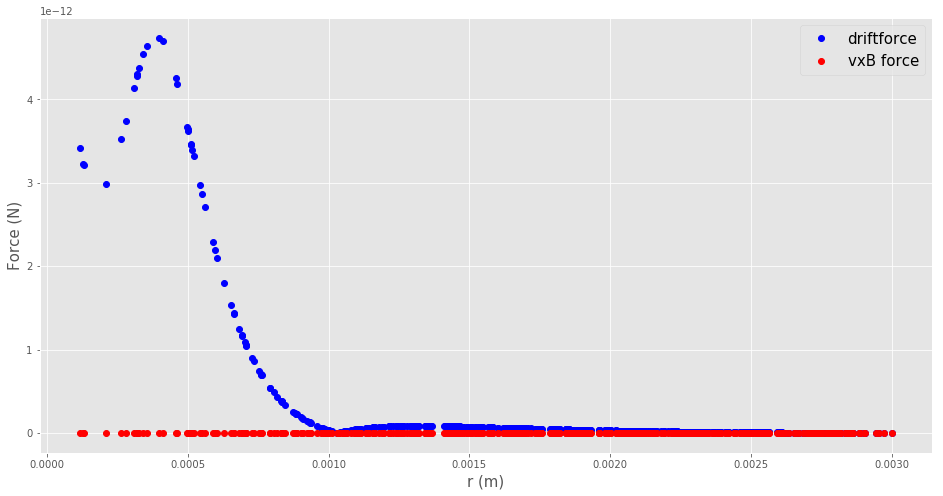

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

ax.plot(positions,const.md*numpy.array(driftforcelist),'bo',label='driftforce')
ax.plot(positions,vxbforcelist,'ro',label='vxB force')
ax.set_xlabel("r (m)", fontsize=15)
ax.set_ylabel("Force (N)", fontsize=15)
ax.legend(fontsize=15);

# Plot of the strength of the drift velocity $v_{drift} = \frac{E \times B}{B^2}$ against the the radial distance (NO SHEATH FIELD INCLUDED IN THE CROSS PRODUCT)

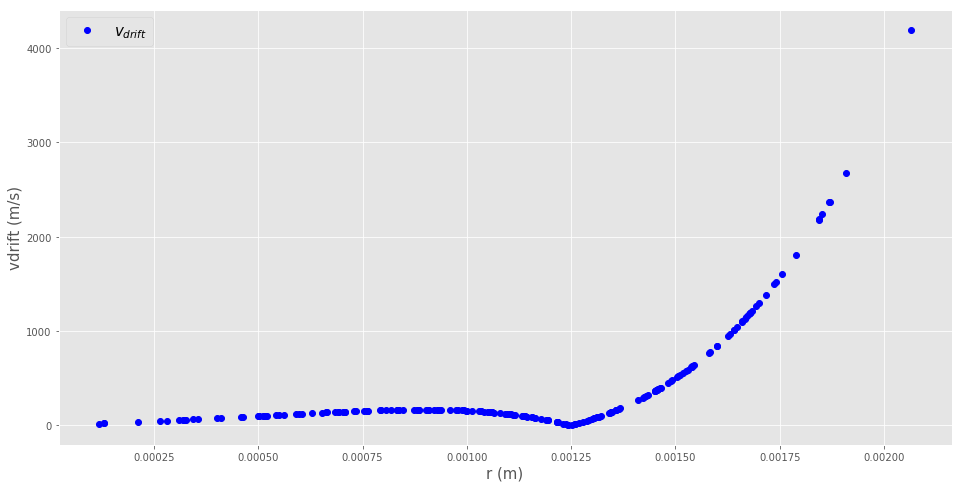

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

ax.plot(positions[0:200],crossnosheath[0:200],'bo',label=r'$v_{drift}$')
ax.set_xlabel("r (m)", fontsize=15)
ax.set_ylabel("vdrift (m/s)", fontsize=15)
ax.legend(fontsize=15);

Notice that at the cross product goes to zero at a specific radial distance *r* where where z component of the **B** field $\rightarrow 0$ so that the cross product between the radial E field and **B** field $\rightarrow 0$. This $B_z=0$ occurs around r = 0.00125, which is shown in the above figure.

# Plot of the strength of the drift velocity $v_{drift} = \frac{E \times B}{B^2}$ against the the radial distance (SHEATH FIELD IS INCLUDED IN THE CROSS PRODUCT)

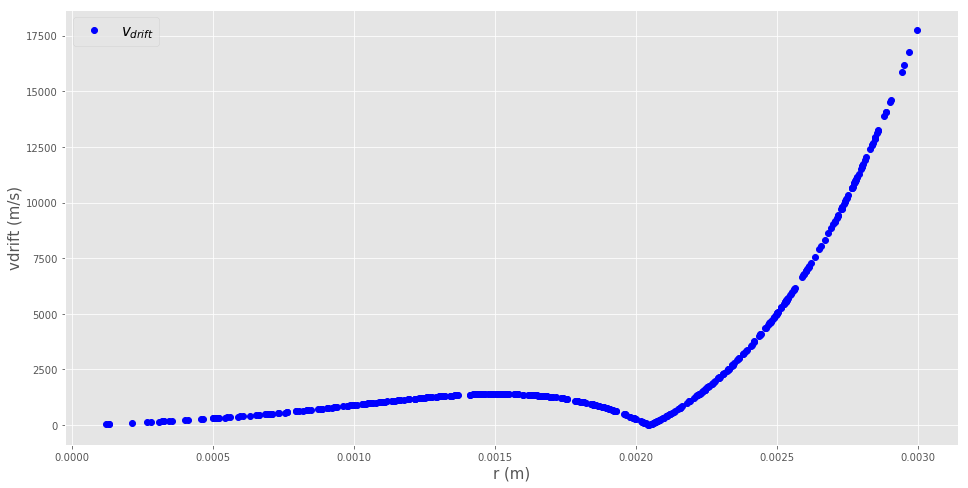

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

ax.plot(positions,crosswithsheath,'bo',label=r'$v_{drift}$')
ax.set_xlabel("r (m)", fontsize=15)
ax.set_ylabel("vdrift (m/s)", fontsize=15)
ax.legend(fontsize=15);

Here, the sheath electric field is also included! Notice the shape of the vdrift stays the same but the zero of the function is shifted to a larger r value. This can be explained by looking at the direction of the EXB drift. Before we reach the point where $B_z$ changes direction, both the $E \times B$ vector is pointing in the same direction (radial E cross $B_z$ and sheath E cross $B_r$). This means that when the first cross product involving $B_z \rightarrow 0$, there is still the component due to the sheath. However after we pass the point where the $B_z$ value changes direction, the radial E cross $B_z$ component is now in the opposite direction to the sheath E field cross $B_r$ and thus this will decrease the total drift velocity to zero again at a later distance as shown in the figure at $r \approx 0.002$

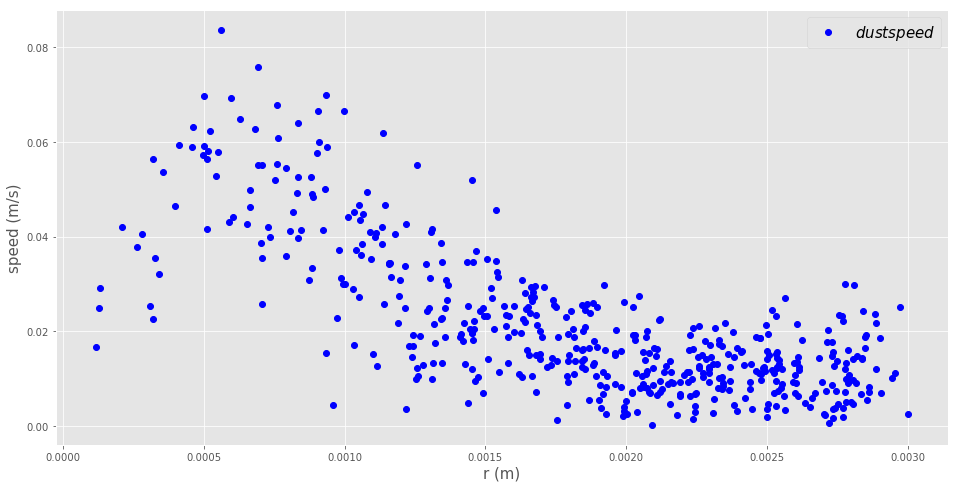

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

ax.plot(positions,velocities,'bo',label=r'$dust speed$')
ax.set_xlabel("r (m)", fontsize=15)
ax.set_ylabel("speed (m/s)", fontsize=15)
ax.legend(fontsize=15);